In [1]:
#Housekeeping
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy as scipy
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import os
import json
import pandas
import numpy
import optparse
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)



<ipython-input-1-bcced1a22711>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Colab_Notebooks/MSCA_Machine_Learning/used_cars_data.csv"


In [ ]:
##random subset of 100k rows
#import random

#filename = path
#n = sum(1 for line in open(filename)) - 1  # number of records in file (excludes header)
#s = 100000  # desired sample size
#skip = sorted(random.sample(range(1, n+1), n-s))  # the 0-indexed header will not be included in the skip list

#df3 = pd.read_csv(filename, skiprows=skip)

<ipython-input-24-84e0442a0ed9>:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(filename, skiprows=skip)


In [4]:
df3 = pd.read_csv(path)

<ipython-input-4-aba8fc27db96>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(path)


In [5]:
df=df3

In [ ]:
len(df)

3000040

In [6]:
import pandas as pd
import numpy as np
import re

# Define a function to remove non-numeric characters
def remove_non_numeric(text):
    if pd.isnull(text):
        return np.nan
    else:
        cleaned = re.sub(r'[^\d.]', '', text)
        return float(cleaned) if cleaned else np.nan

# Define columns to drop
drop_cols = ['vin', 'listing_id', 'latitude', 'longitude', 'main_picture_url', 'major_options', 
             'power', 'sp_name', 'theft_title', 'torque', 'transmission_display', 'trimId', 
             'trim_name', 'vehicle_damage_category', 'wheel_system_display']

# Define columns to clean
clean_cols = ['back_legroom', 'bed', 'front_legroom', 'fuel_tank_volume', 'height', 
              'length', 'maximum_seating', 'wheelbase', 'width']

# Drop unnecessary columns
df = df.drop(drop_cols, axis=1)

# Clean specific columns
for col in clean_cols:
    df[col] = df[col].apply(remove_non_numeric)

# Check number of numeric and non-numeric columns
num_cols = df.select_dtypes(include=[np.number]).shape[1]
non_num_cols = df.select_dtypes(exclude=[np.number]).shape[1]

print(f'Number of numeric columns: {num_cols}')
print(f'Number of non-numeric columns: {non_num_cols}')

# For non-numeric columns, check the number of unique categories in each
for col in df.select_dtypes(exclude=[np.number]).columns:
    print(f'{col}: {df[col].nunique()} unique values')


Number of numeric columns: 23
Number of non-numeric columns: 28
bed_height: 1 unique values
bed_length: 83 unique values
body_type: 9 unique values
cabin: 4 unique values
city: 4687 unique values
dealer_zip: 9215 unique values
description: 2519325 unique values
engine_cylinders: 39 unique values
engine_type: 39 unique values
exterior_color: 28665 unique values
fleet: 2 unique values
frame_damaged: 2 unique values
franchise_dealer: 2 unique values
franchise_make: 48 unique values
fuel_type: 8 unique values
has_accidents: 2 unique values
interior_color: 45726 unique values
isCab: 2 unique values
is_cpo: 1 unique values
is_new: 2 unique values
is_oemcpo: 1 unique values
listed_date: 1749 unique values
listing_color: 15 unique values
make_name: 100 unique values
model_name: 1429 unique values
salvage: 2 unique values
transmission: 4 unique values
wheel_system: 5 unique values


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Remove columns missing more than 75% of population
missing_data = df.isnull().mean()
df = df.loc[:, missing_data <= 0.75]

# 2. Remove non-numeric columns with over 10 subcategories
for col in df.select_dtypes(exclude=[np.number]).columns:
    if df[col].nunique() > 10 and col != 'make_name':
        df = df.drop(col, axis=1)

# 3. One hot encode the remaining non-numeric columns
df = pd.get_dummies(df)

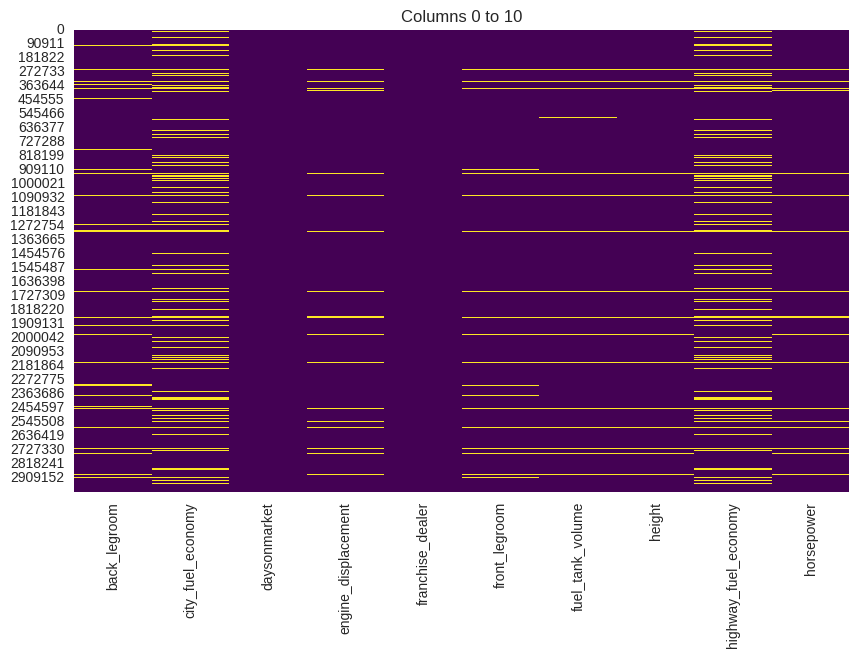

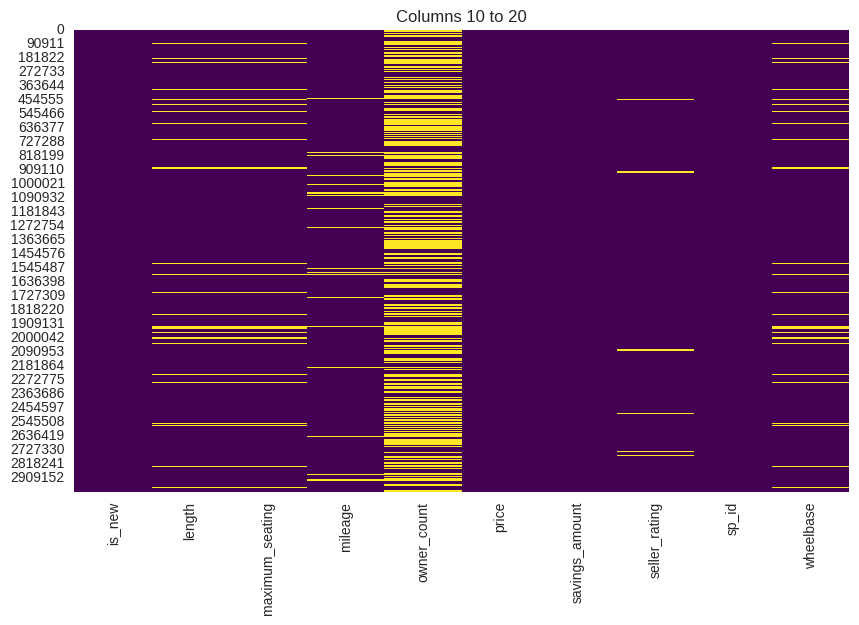

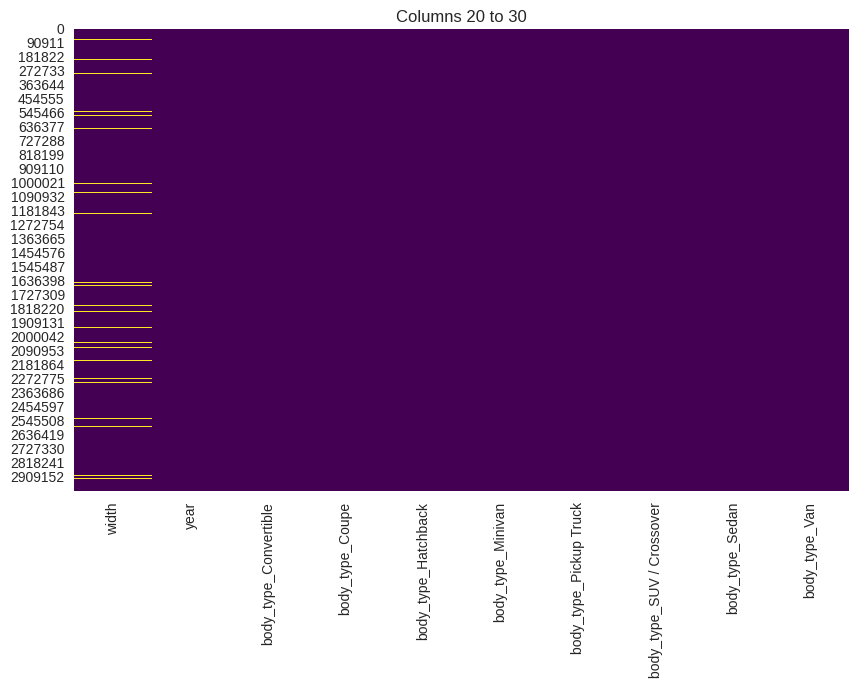

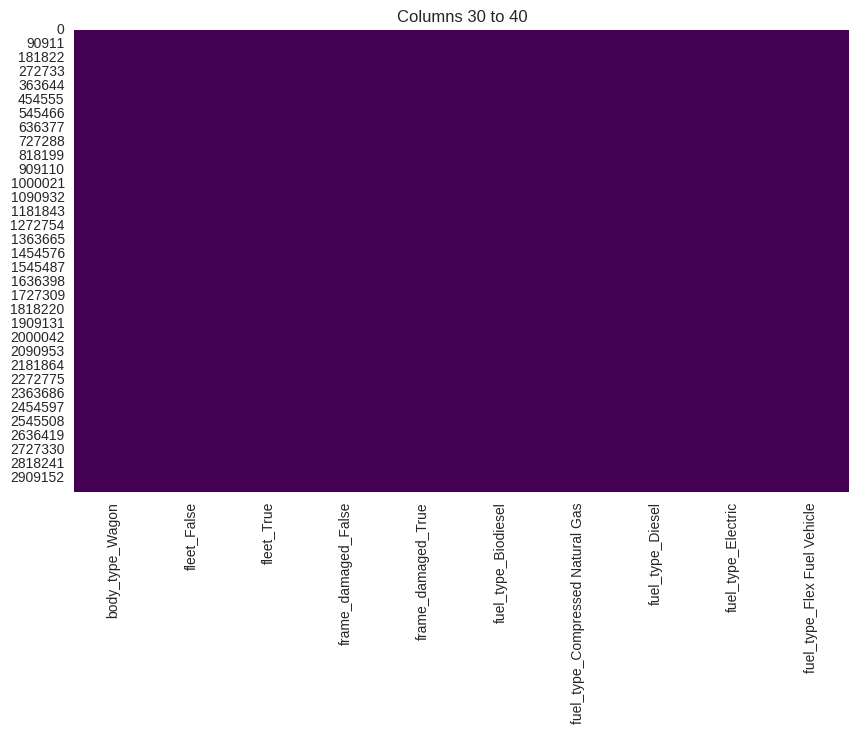

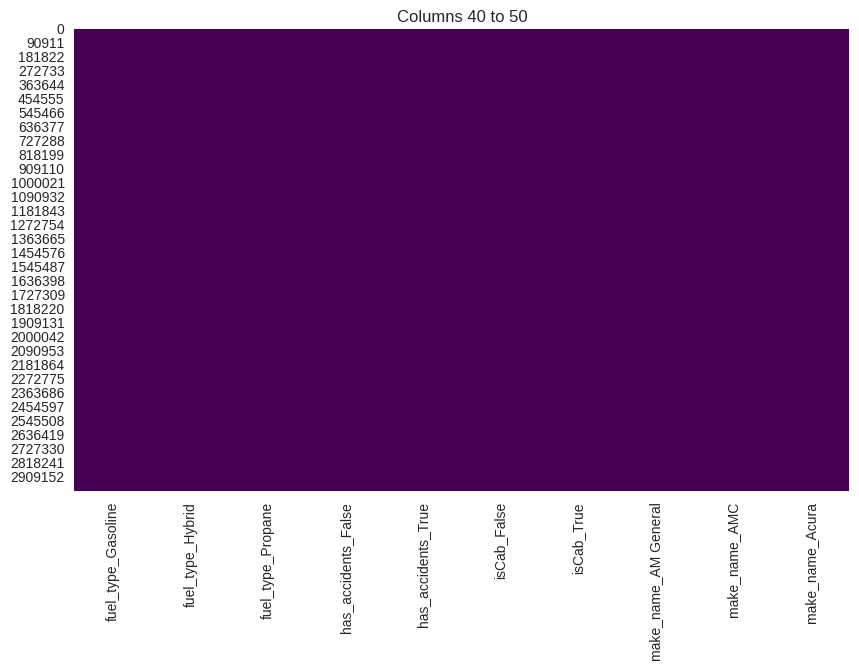

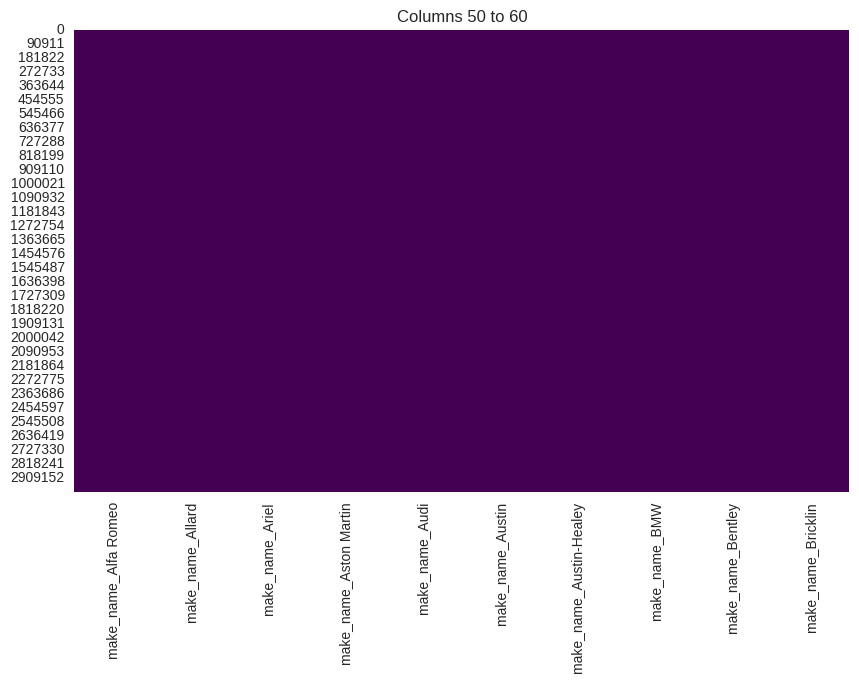

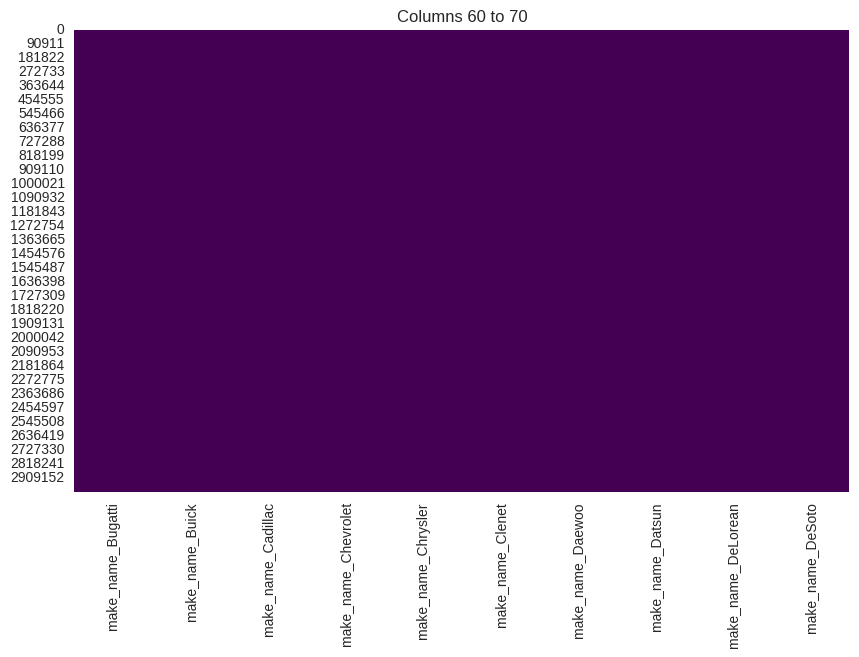

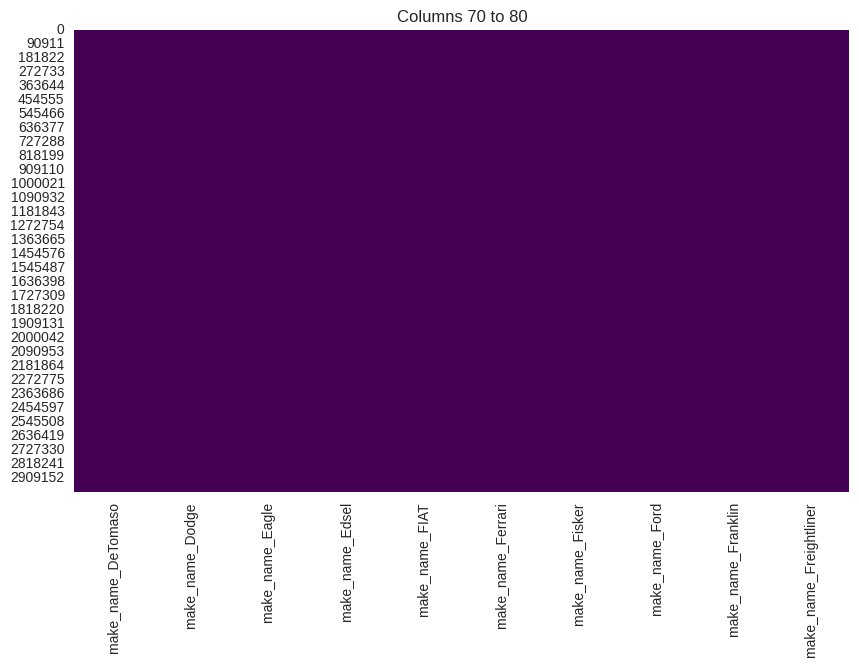

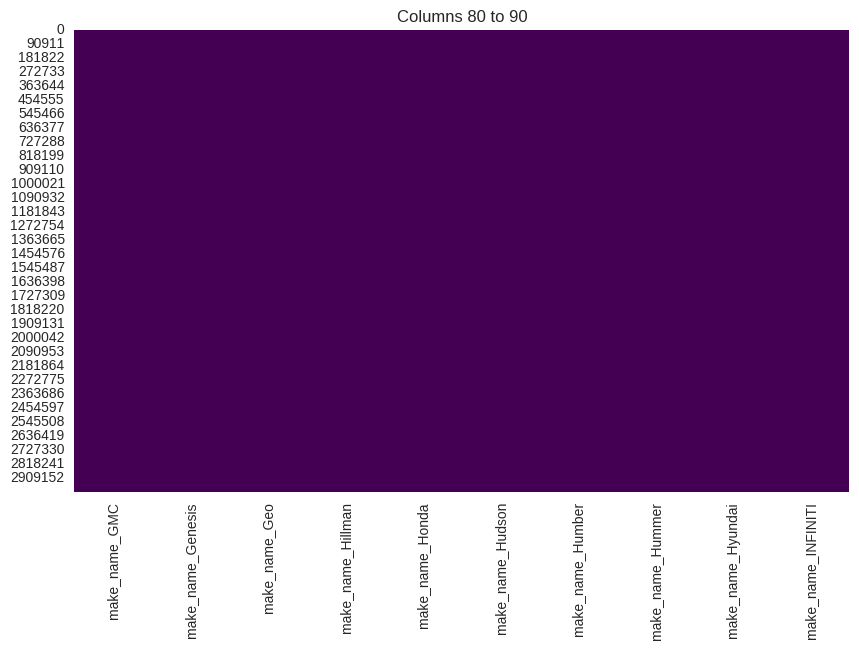

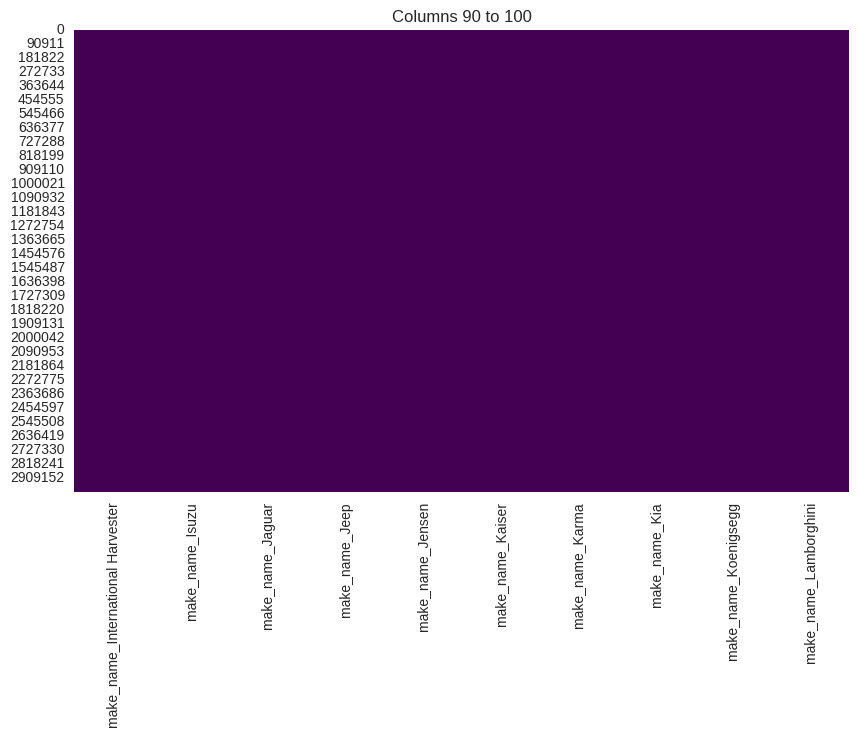

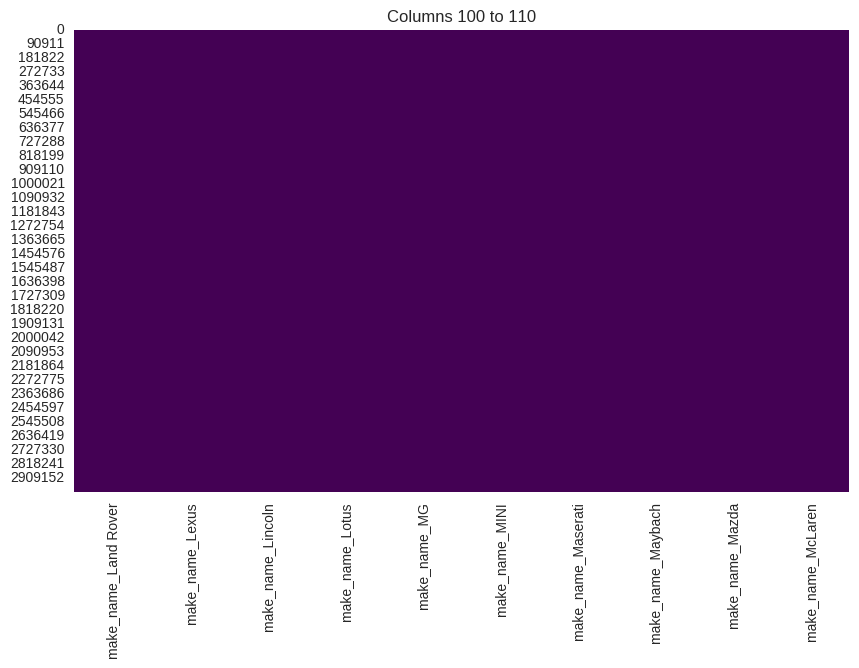

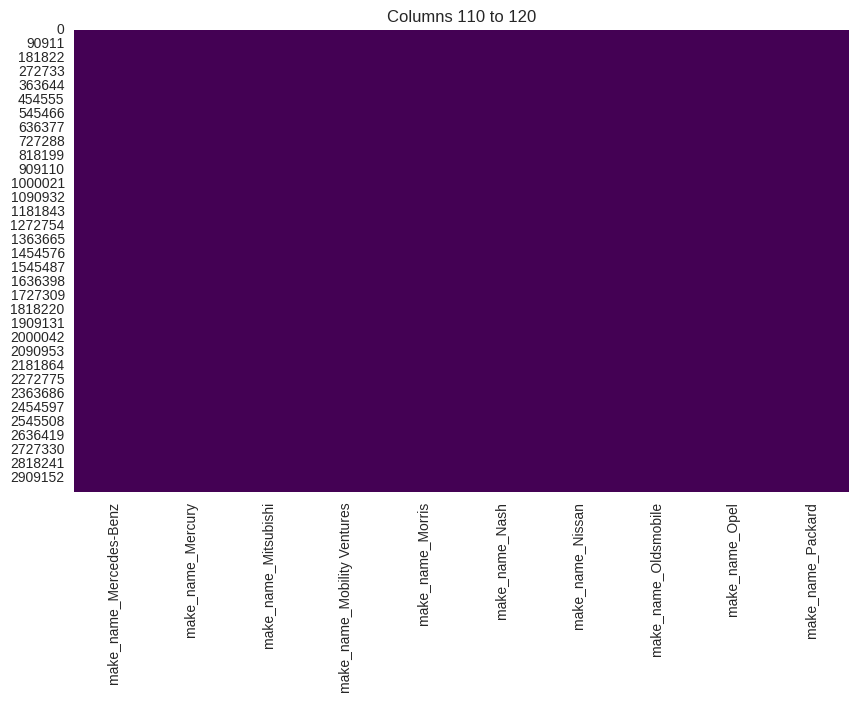

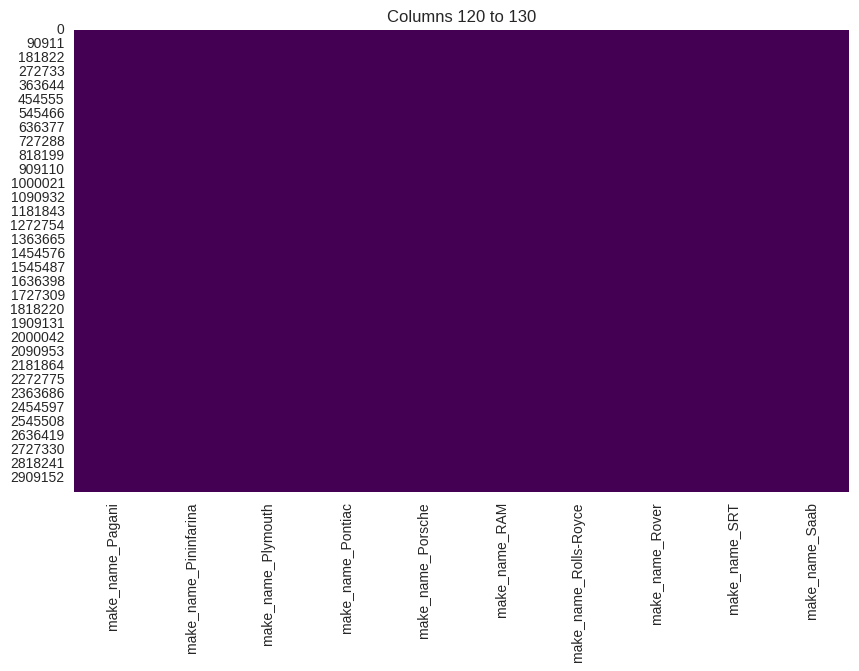

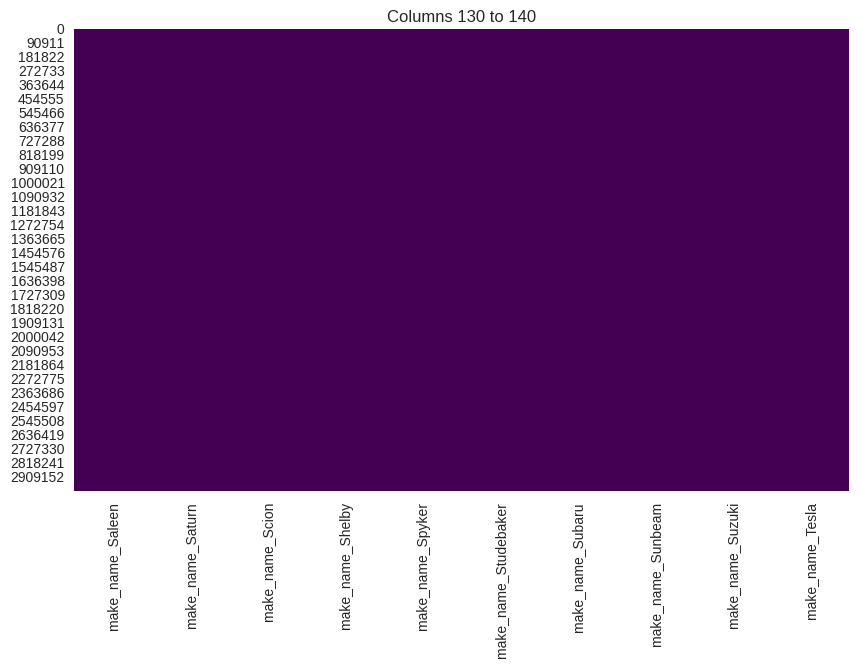

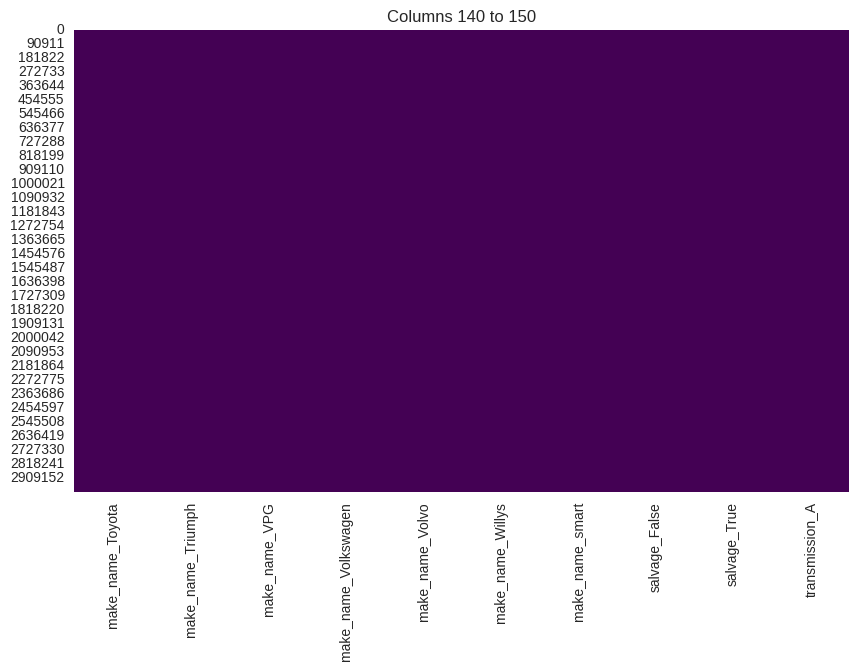

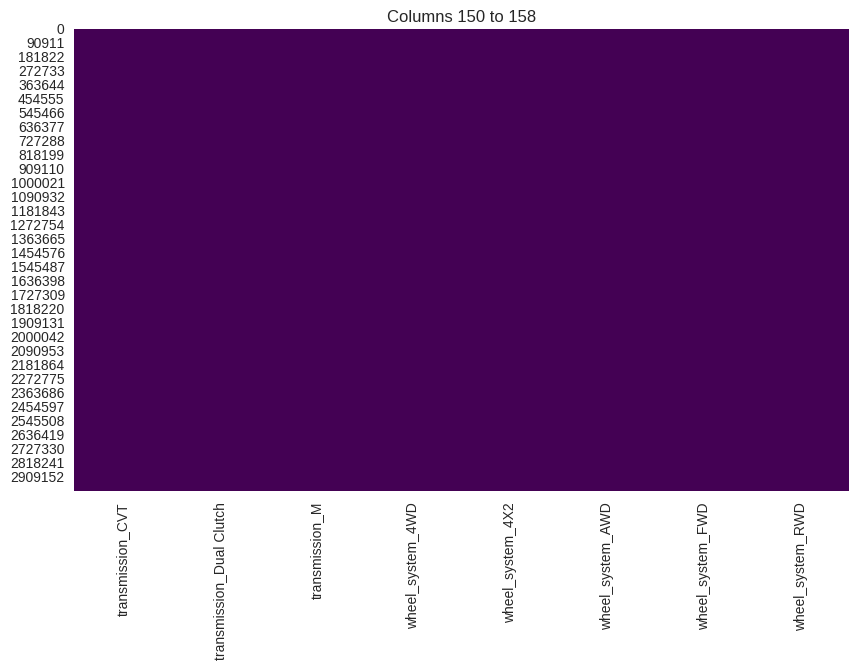

In [ ]:
# 4. Plot heatmaps for missing data
n_cols = df.shape[1]
for i in range(0, n_cols, 10):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.iloc[:, i:min(i+10, n_cols)].isnull(), cbar=False, cmap='viridis')
    plt.title(f'Columns {i} to {min(i+10, n_cols)}')
    plt.show()

In [8]:
# Number of rows before dropping
num_rows_before = df.shape[0]

# Drop rows with missing values
df_no_na = df.dropna()

# Number of rows after dropping
num_rows_after = df_no_na.shape[0]

# Calculate and print number of rows dropped
num_rows_dropped = num_rows_before - num_rows_after
print(f"Number of rows dropped: {num_rows_dropped}")


Number of rows dropped: 1809343


In [9]:
df.head()

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,is_new,length,maximum_seating,mileage,owner_count,price,savings_amount,seller_rating,sp_id,wheelbase,width,year,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,fleet_False,fleet_True,frame_damaged_False,frame_damaged_True,fuel_type_Biodiesel,fuel_type_Compressed Natural Gas,fuel_type_Diesel,fuel_type_Electric,fuel_type_Flex Fuel Vehicle,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Propane,has_accidents_False,has_accidents_True,isCab_False,isCab_True,make_name_AM General,make_name_AMC,make_name_Acura,make_name_Alfa Romeo,make_name_Allard,make_name_Ariel,make_name_Aston Martin,make_name_Audi,make_name_Austin,make_name_Austin-Healey,make_name_BMW,make_name_Bentley,make_name_Bricklin,make_name_Bugatti,make_name_Buick,make_name_Cadillac,make_name_Chevrolet,make_name_Chrysler,make_name_Clenet,make_name_Daewoo,make_name_Datsun,make_name_DeLorean,make_name_DeSoto,make_name_DeTomaso,make_name_Dodge,make_name_Eagle,make_name_Edsel,make_name_FIAT,make_name_Ferrari,make_name_Fisker,make_name_Ford,make_name_Franklin,make_name_Freightliner,make_name_GMC,make_name_Genesis,make_name_Geo,make_name_Hillman,make_name_Honda,make_name_Hudson,make_name_Humber,make_name_Hummer,make_name_Hyundai,make_name_INFINITI,make_name_International Harvester,make_name_Isuzu,make_name_Jaguar,make_name_Jeep,make_name_Jensen,make_name_Kaiser,make_name_Karma,make_name_Kia,make_name_Koenigsegg,make_name_Lamborghini,make_name_Land Rover,make_name_Lexus,make_name_Lincoln,make_name_Lotus,make_name_MG,make_name_MINI,make_name_Maserati,make_name_Maybach,make_name_Mazda,make_name_McLaren,make_name_Mercedes-Benz,make_name_Mercury,make_name_Mitsubishi,make_name_Mobility Ventures,make_name_Morris,make_name_Nash,make_name_Nissan,make_name_Oldsmobile,make_name_Opel,make_name_Packard,make_name_Pagani,make_name_Pininfarina,make_name_Plymouth,make_name_Pontiac,make_name_Porsche,make_name_RAM,make_name_Rolls-Royce,make_name_Rover,make_name_SRT,make_name_Saab,make_name_Saleen,make_name_Saturn,make_name_Scion,make_name_Shelby,make_name_Spyker,make_name_Studebaker,make_name_Subaru,make_name_Sunbeam,make_name_Suzuki,make_name_Tesla,make_name_Toyota,make_name_Triumph,make_name_VPG,make_name_Volkswagen,make_name_Volvo,make_name_Willys,make_name_smart,salvage_False,salvage_True,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4WD,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,35.10,NaN,522,1300.00,True,41.20,12.70,66.50,NaN,177.00,True,166.60,5.00,7.00,NaN,23141.00,0,2.80,370599.00,101.20,79.60,2019,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,38.10,NaN,207,2000.00,True,39.10,17.70,68.00,NaN,246.00,True,181.00,7.00,8.00,NaN,46500.00,0,3.00,389227.00,107.90,85.60,2020,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,35.40,17.00,1233,2500.00,True,43.30,15.90,58.10,23.00,305.00,False,180.90,5.00,NaN,3.00,46995.00,0,NaN,370467.00,104.30,78.90,2016,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,37.60,NaN,196,3000.00,True,39.00,23.50,73.00,NaN,340.00,True,195.10,7.00,11.00,NaN,67430.00,0,3.00,3892

In [10]:
# Calculate number of unique values in 'owner_count'
num_unique_values = df['owner_count'].nunique()
print(f"Number of unique values in 'owner_count': {num_unique_values}")

# Drop 'owner_count' column
df_dropped = df.drop(columns='owner_count')

# Number of rows before dropping
num_rows_before = df_dropped.shape[0]

# Drop rows with missing values
df_no_na = df_dropped.dropna()

# Number of rows after dropping
num_rows_after = df_no_na.shape[0]

# Calculate and print number of rows dropped
num_rows_dropped = num_rows_before - num_rows_after
print(f"Number of rows dropped: {num_rows_dropped}")


Number of unique values in 'owner_count': 18
Number of rows dropped: 709594


In [11]:
# Calculate number of unique values in 'owner_count'
num_unique_values = df['owner_count'].nunique()
print(f"Number of unique values in 'owner_count': {num_unique_values}")

# Drop 'owner_count' column
df = df.drop(columns='owner_count')

# Number of rows before dropping
num_rows_before = df.shape[0]

# Drop rows with missing values
df = df.dropna()

# Number of rows after dropping
num_rows_after = df.shape[0]

# Calculate and print number of rows dropped
num_rows_dropped = num_rows_before - num_rows_after
print(f"Number of rows dropped: {num_rows_dropped}")
print(f"Number of rows remaining: {num_rows_after}")


Number of unique values in 'owner_count': 18
Number of rows dropped: 709594
Number of rows remaining: 2290446


In [ ]:
#download
# Write DataFrame to CSV
#df.to_csv('cleaned_data.csv', index=False)


In [ ]:
#from google.colab import files
#files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Print data types for all columns
print(df.dtypes.to_string())


back_legroom                         float64
city_fuel_economy                    float64
daysonmarket                           int64
engine_displacement                  float64
franchise_dealer                        bool
front_legroom                        float64
fuel_tank_volume                     float64
height                               float64
highway_fuel_economy                 float64
horsepower                           float64
is_new                                  bool
length                               float64
maximum_seating                      float64
mileage                              float64
price                                float64
savings_amount                         int64
seller_rating                        float64
sp_id                                float64
wheelbase                            float64
width                                float64
year                                   int64
body_type_Convertible                  uint8
body_type_

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import ParameterSampler
from scipy.stats.distributions import randint, expon
EPOCHS = 250  # changed epochs to 250
BATCH_SIZE = 512  # changed batch size to 512
LEARNING_RATE = 0.01  # set a static learning rate of 0.01
NUM_FEATURES = len(X.columns)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)
import torch
import torch.nn as nn


class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 128)
        self.layer_2 = nn.Linear(128, 256)
        self.layer_3 = nn.Linear(256, 512)
        self.layer_4 = nn.Linear(512, 1024)
        self.layer_5 = nn.Linear(1024, 2048)
        self.layer_6 = nn.Linear(2048, 4096)  # Extra layer
        self.layer_7 = nn.Linear(4096, 2048)  # Extra layer
        self.layer_8 = nn.Linear(2048, 1024)
        self.layer_9 = nn.Linear(1024, 512)
        self.layer_10 = nn.Linear(512, 256)
        self.layer_11 = nn.Linear(256, 128)
        self.layer_out = nn.Linear(128, 1)  # The output layer
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.relu(self.layer_5(x))
        x = self.relu(self.layer_6(x))
        x = self.relu(self.layer_7(x))
        x = self.relu(self.layer_8(x))
        x = self.relu(self.layer_9(x))
        x = self.relu(self.layer_10(x))
        x = self.relu(self.layer_11(x))
        x = self.layer_out(x)
        return x
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.relu(self.layer_5(x))
        x = self.relu(self.layer_6(x))
        x = self.relu(self.layer_7(x))
        x = self.relu(self.layer_8(x))
        x = self.relu(self.layer_9(x))
        x = self.relu(self.layer_10(x))
        x = self.relu(self.layer_11(x))
        x = self.layer_out(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

loss_stats = {
    'train': [],
    "val": []
}
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')


cuda:0
MultipleRegression(
  (layer_1): Linear(in_features=156, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=512, bias=True)
  (layer_4): Linear(in_features=512, out_features=1024, bias=True)
  (layer_5): Linear(in_features=1024, out_features=2048, bias=True)
  (layer_6): Linear(in_features=2048, out_features=4096, bias=True)
  (layer_7): Linear(in_features=4096, out_features=2048, bias=True)
  (layer_8): Linear(in_features=2048, out_features=1024, bias=True)
  (layer_9): Linear(in_features=1024, out_features=512, bias=True)
  (layer_10): Linear(in_features=512, out_features=256, bias=True)
  (layer_11): Linear(in_features=256, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)
Begin training.


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 2734.42296 | Val Loss: 0.26746
Epoch 002: | Train Loss: 0.22556 | Val Loss: 0.17786
Epoch 003: | Train Loss: 0.13309 | Val Loss: 0.04352
Epoch 004: | Train Loss: 0.04185 | Val Loss: 0.03341
Epoch 005: | Train Loss: 0.04147 | Val Loss: 0.03643
Epoch 006: | Train Loss: 0.03656 | Val Loss: 0.03372
Epoch 007: | Train Loss: 0.04090 | Val Loss: 0.02895
Epoch 008: | Train Loss: 0.03588 | Val Loss: 0.02820
Epoch 009: | Train Loss: 0.03100 | Val Loss: 0.03326
Epoch 010: | Train Loss: 0.03017 | Val Loss: 0.02860
Epoch 011: | Train Loss: 0.02981 | Val Loss: 0.03633
Epoch 012: | Train Loss: 1.91425 | Val Loss: 0.32513
Epoch 013: | Train Loss: 0.33458 | Val Loss: 0.33405
Epoch 014: | Train Loss: 0.33576 | Val Loss: 0.32585
Epoch 015: | Train Loss: 0.33322 | Val Loss: 0.34539
Epoch 016: | Train Loss: 0.33024 | Val Loss: 0.32903
Epoch 017: | Train Loss: 0.32723 | Val Loss: 0.33643
Epoch 018: | Train Loss: 0.32671 | Val Loss: 0.33437
Epoch 019: | Train Loss: 0.32610 | Val Loss

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

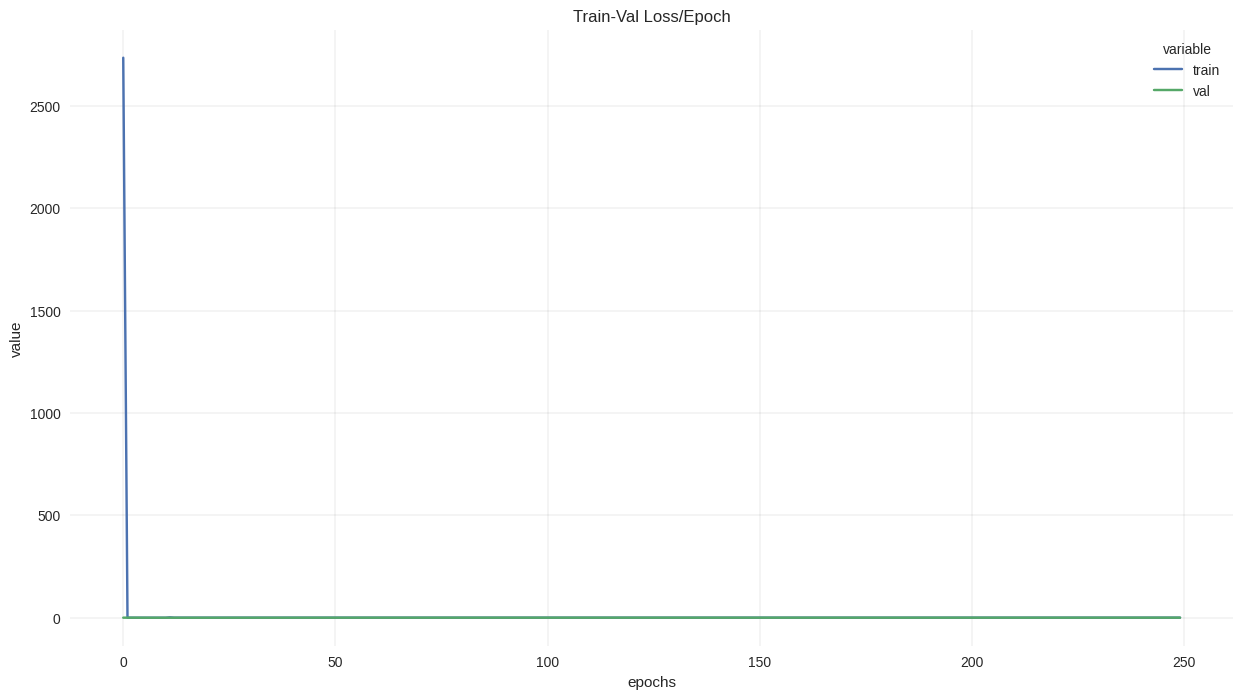

In [21]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

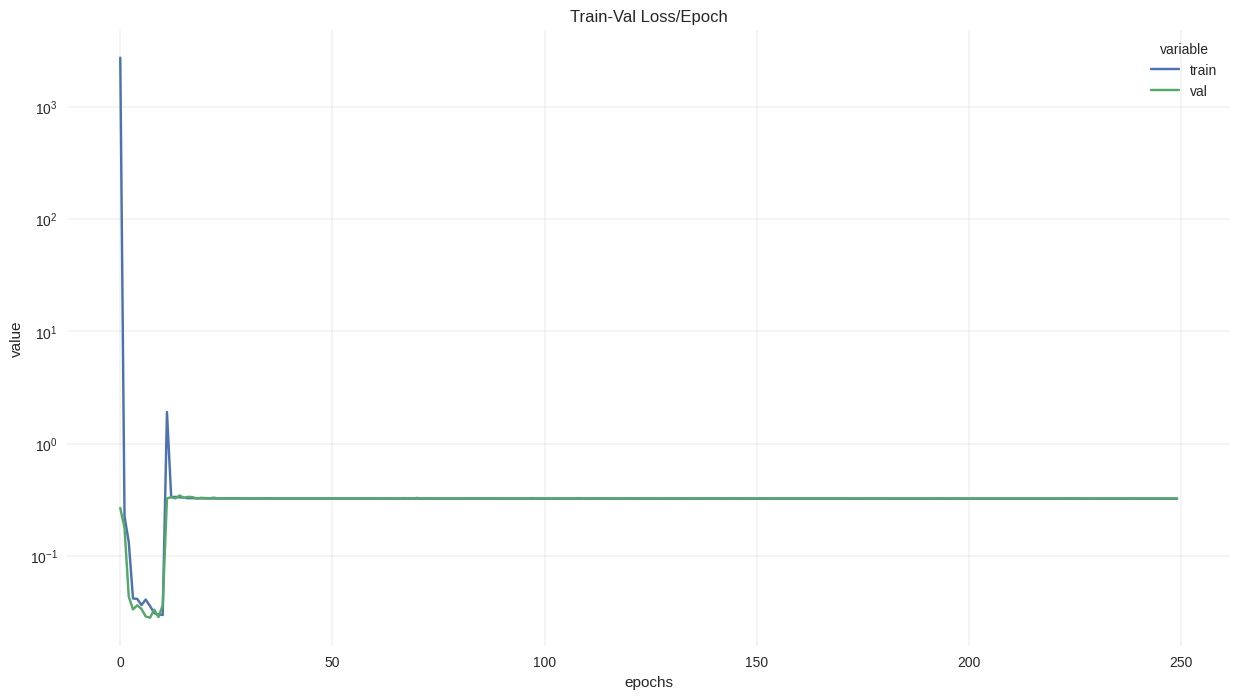

In [24]:
# Your code here
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Add the following line to use a logarithmic scale for the y-axis
plt.yscale('log')

sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')


In [25]:
model = MultipleRegression(NUM_FEATURES)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {total_params}')

Total number of parameters: 22379905


In [22]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [23]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)
print("RMSE :",rmse)

Mean Squared Error : 0.32399078331182507
R^2 : -0.00011939257501780709
RMSE : 0.5692018827374212
